Алгоритм Козинця

1. Згенерувати N тривимірних незалежних випадкових векторів, в яких координати незалежні,  перші дві координати мають показниковий розподіл з параметром 1, третя координата має стандартний нормальний розподіл. 

2. Реалізувати алгоритм Козинця пошуку розділяючого вектора для опуклої оболонки згенерованих векторів. Алгоритм має працювати для довільного N.

In [18]:
import numpy as np

def generate_vectors(N):
    x1 = np.random.exponential(scale=1, size=N)
    x2 = np.random.exponential(scale=1, size=N)
    x3 = np.random.normal(loc=0, scale=1, size=N)
    vectors = np.column_stack((x1, x2, x3))
    return vectors

N = 50

vectors = generate_vectors(N)
vectors[:10]

array([[ 1.5220454 ,  0.37782219,  1.52034853],
       [ 0.51897786,  1.60703624,  0.101187  ],
       [ 1.60635844,  0.03506354, -0.30291416],
       [ 0.25176347,  0.14814379, -1.6794452 ],
       [ 3.77320313,  0.18604391, -0.57124731],
       [ 2.69465681,  0.74216026,  3.53803898],
       [ 0.26110692,  0.33341873,  2.47919219],
       [ 0.46073729,  0.32119676,  0.13462611],
       [ 1.26194195,  1.56336414,  0.33529131],
       [ 0.00995718,  0.38685715,  1.74716905]])

In [19]:
from scipy.spatial import ConvexHull

def kozynets(vectors):
    hull = ConvexHull(vectors)
    separating_vector = hull.equations[0][:3]
    return separating_vector

separating_vector = kozynets(vectors)
print("Розділювальний вектор:", separating_vector)

Розділювальний вектор: [ 0.18856416 -0.96539783  0.18014045]


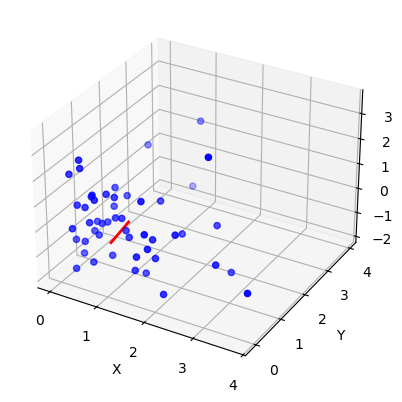

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], color='b', marker='o')
origin = np.mean(vectors, axis=0)
line = np.array([origin, origin + separating_vector])
ax.plot(line[:, 0], line[:, 1], line[:, 2], color='r', lw=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()